In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc

In [6]:
pH = 6.7
m1 = mc.Molecule(np.array([0.0,0.0,0.0]),50)
m2 = mc.Molecule(np.array([200.0,0.0,0.0]),50)


#mc.dist(m1,m2)


print(fc.vdw(m1,m2))
#print(fc.steric(m1,m2))
#print(fc.elec_rep(m1,m2))

-0.000664099035814288


[2.8280676509062516e-08, 3.3756589484496176e-08, 3.9871072066519334e-08, 4.6594900532337505e-08, 5.3883185876842825e-08, 6.168014465420578e-08, 6.992424887446272e-08, 7.855289615213238e-08, 8.75060629430655e-08, 9.672875601280431e-08, 1.0617234593754448e-07, 1.157950125210328e-07, 1.2556157244910365e-07, 1.3544293363356436e-07, 1.454153657996114e-07, 1.5545971805229375e-07, 1.6556066411324357e-07, 1.757060186729322e-07, 1.8588614320110205e-07, 1.960934440964268e-07, 2.0632195746341261e-07, 2.1656701072299044e-07, 2.2682494993597373e-07, 2.3709292194164274e-07, 2.4736870141491673e-07, 2.5765055425786905e-07, 2.67937130100379e-07, 2.782273779537081e-07, 2.885204801791138e-07, 2.9881580088434156e-07, 3.091128456496623e-07, 3.1941123012876964e-07, 3.297106555885761e-07, 3.400108898663898e-07, 3.5031175255183966e-07, 3.606131034605891e-07, 3.7091483367121404e-07, 3.8121685855682554e-07, 3.9151911236847226e-07, 4.01821544025317e-07, 4.121241138430941e-07, 4.2242679099192027e-07, 4.3272955152

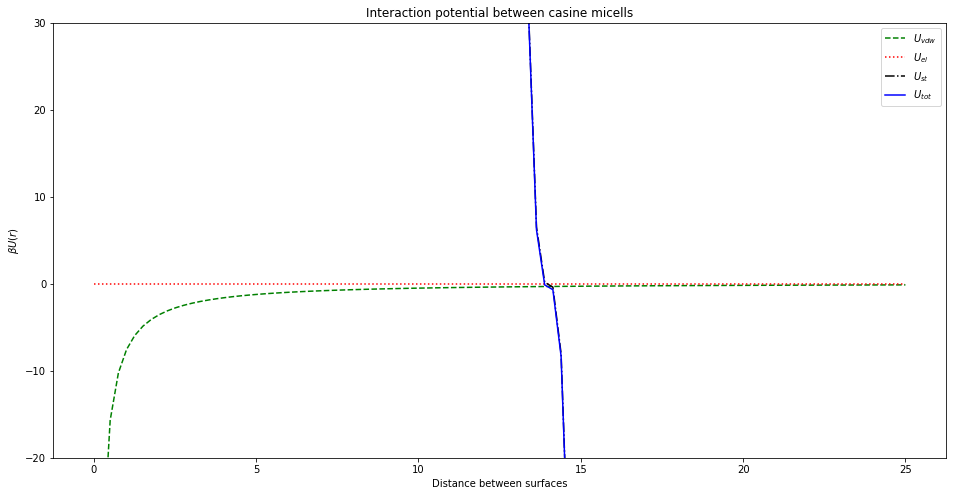

In [7]:
dists = np.linspace(0.00001,25,100)
vdws = []
ess = []
sters = []


for i in dists:
  radius = 100
  dist_between = 2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  vdws.append(fc.vdw(tm1,tm2))
  ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  sters.append(fc.steric(tm1,tm2))

#print(dists)
#print(vdws)
print(ess)
#print(sters)

total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(16,8))

plt.plot(dists, vdws, c="green", label = "$U_{vdw}$", linestyle='--')
plt.plot(dists,ess,c="red",label="$U_{el}$",linestyle=":")
plt.plot(dists,sters,color = "black", label="$U_{st}$",linestyle="-.")
plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()

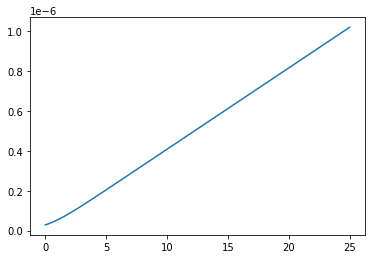

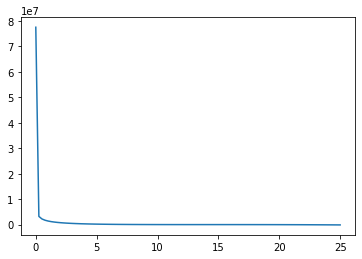

In [8]:
plt.plot(dists,ess)
plt.show()
plt.plot(dists,sters)
plt.show()